### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning

# 1.3
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

# 1.4
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# 1.5
from sklearn.model_selection import GridSearchCV



### Options

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

### Load Data

In [34]:
# defaults excluding NA
na_vals = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', 
           '1.#IND', '1.#QNAN', 'N/A', 'NULL', 'NaN', 'n/a', 'nan', 'null']


df_raw = pd.read_excel('AmesHousing.xls', keep_default_na=False, na_values=na_vals)

df_raw.replace('NA', 'NA_cat', inplace=True) # NA is a category

In [35]:
df_raw.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NA_cat,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NA_cat,NA_cat,NA_cat,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NA_cat,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NA_cat,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NA_cat,MnPrv,NA_cat,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NA_cat,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NA_cat,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NA_cat,NA_cat,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NA_cat,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NA_cat,NA_cat,NA_cat,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NA_cat,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NA_cat,MnPrv,NA_cat,0,3,2010,WD,Normal,189900


### Organize Features

In [36]:
# per the TA answer in this post I treat everything with dtype == object as categorical and 
# everything with dtype != object as continuous: https://piazza.com/class/jop0ywdqsmv6r3?cid=179
msk = (df_raw.dtypes == object)
categorical = msk[msk].index.tolist()
continuous = msk[~msk].index.tolist()
continuous.remove('SalePrice')
target = ['SalePrice']

len(categorical) + len(continuous) + len(target) == df_raw.shape[1]


True

In [37]:
df = df_raw.copy()

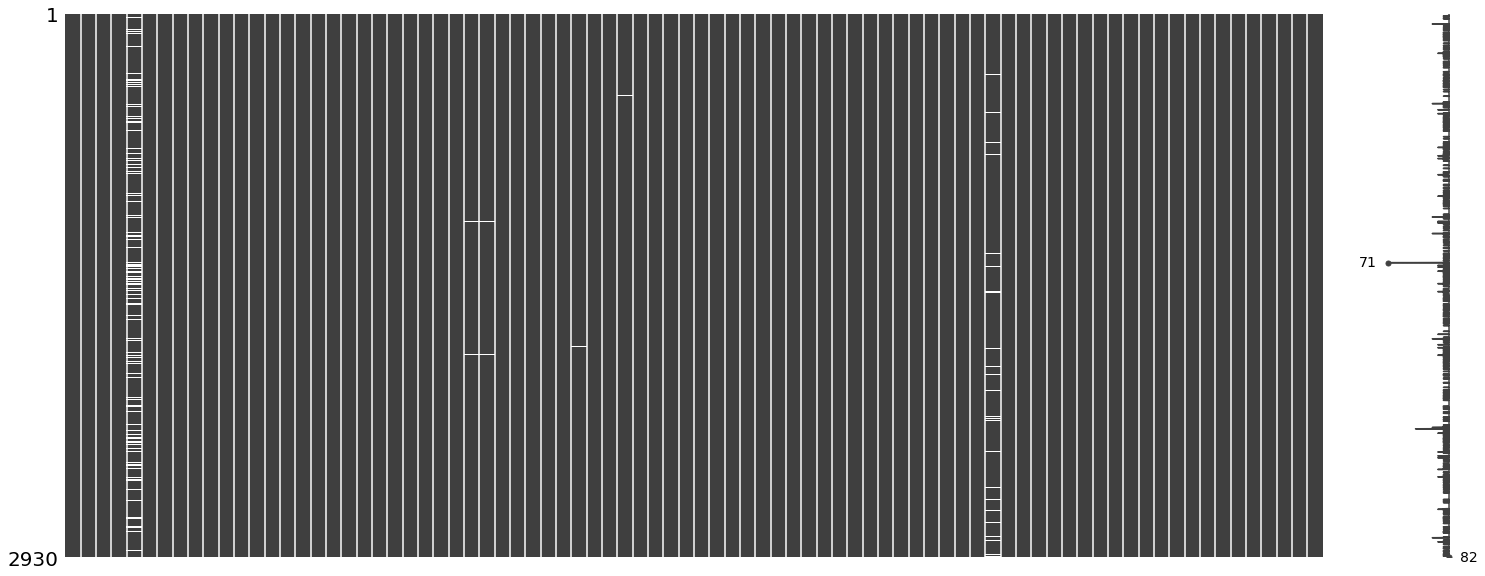

In [38]:
msno.matrix(df)

### 1.1 Visualize the univariate distribution of each continuous, and the distribution of the target. Do you notice anything? Is something that you think might require special treatment (comment what it is, you're not required to try to fix it).

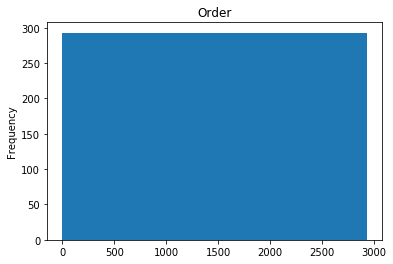

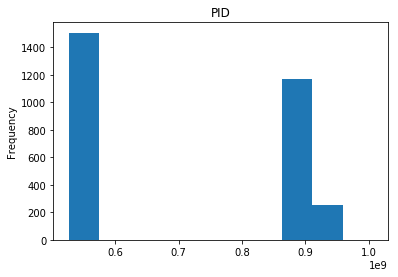

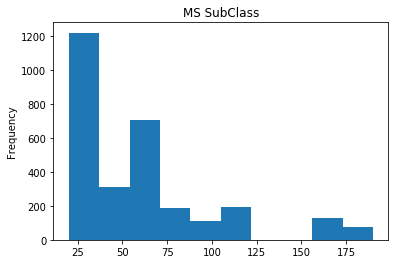

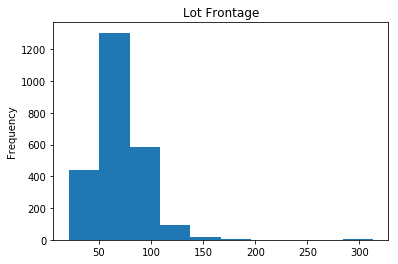

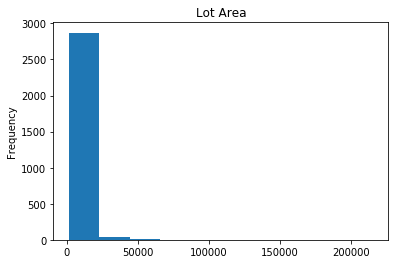

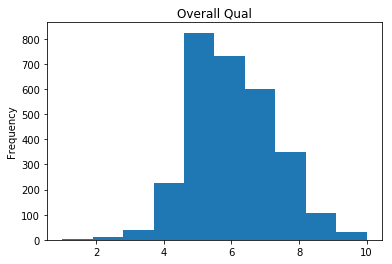

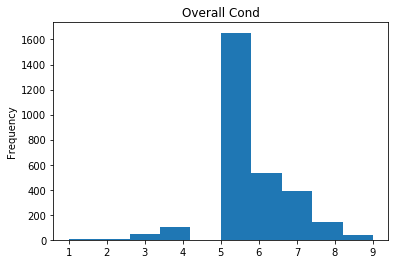

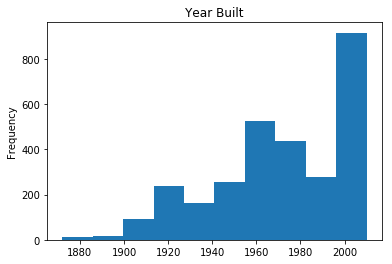

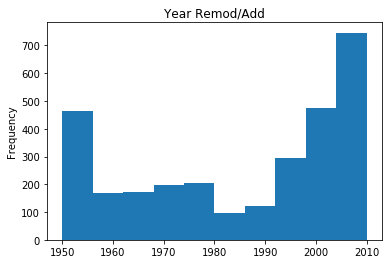

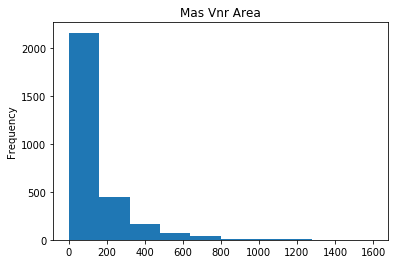

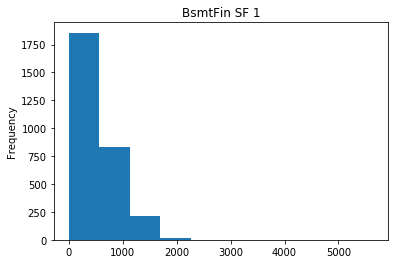

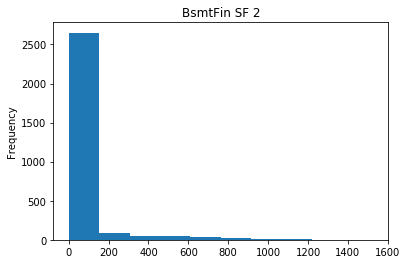

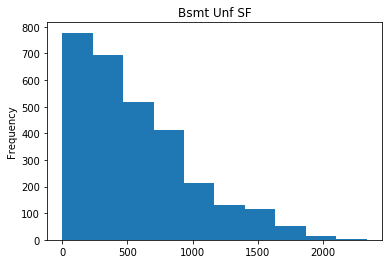

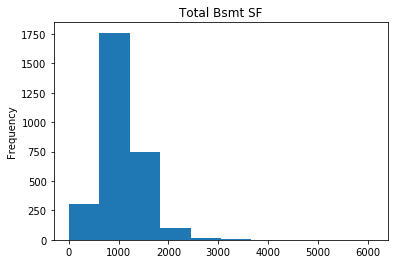

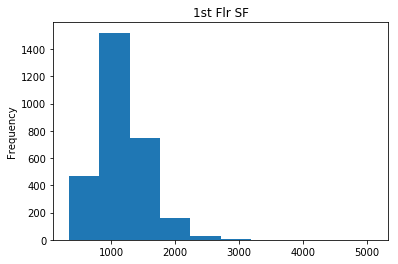

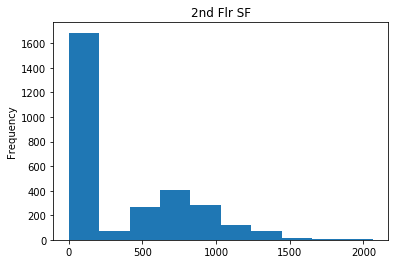

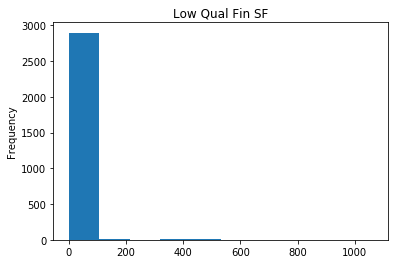

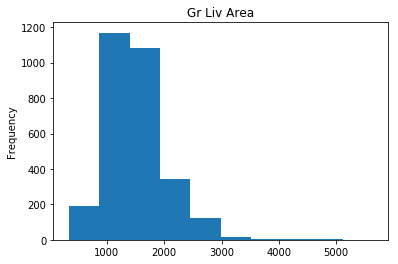

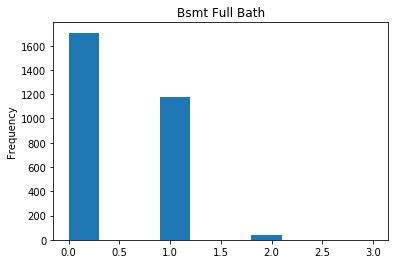

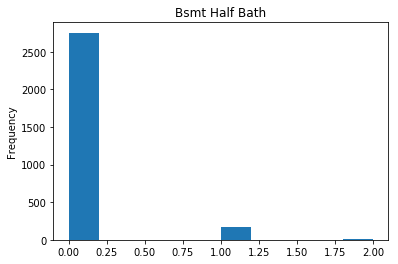

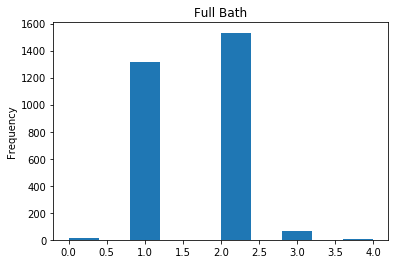

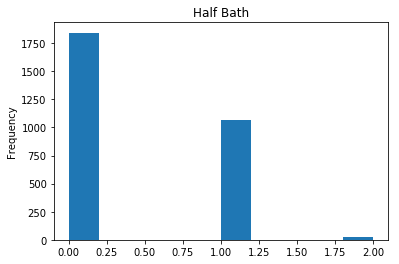

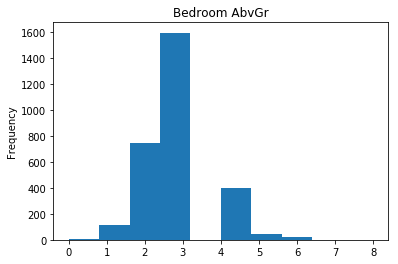

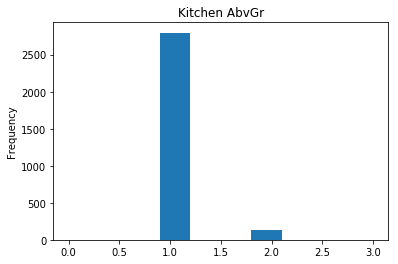

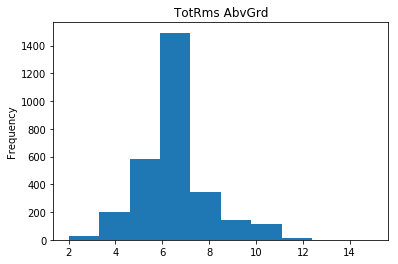

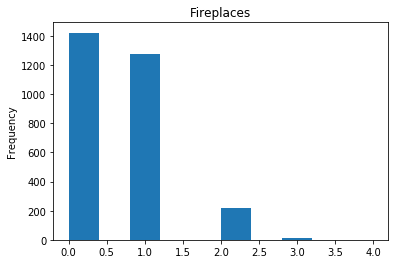

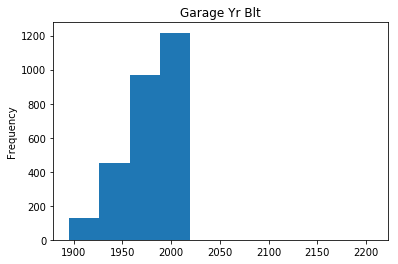

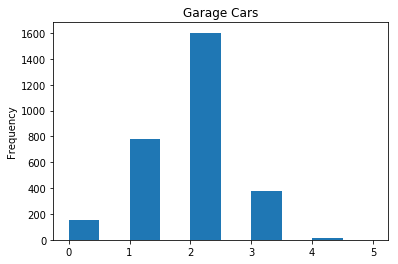

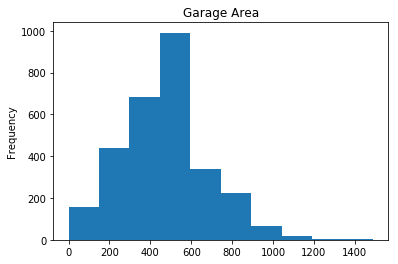

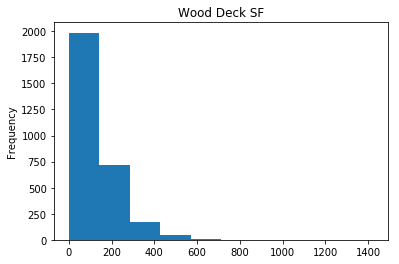

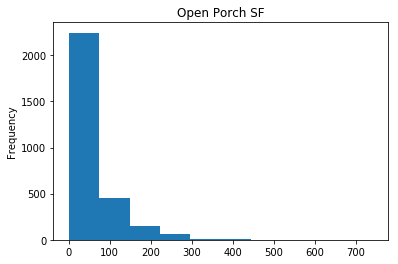

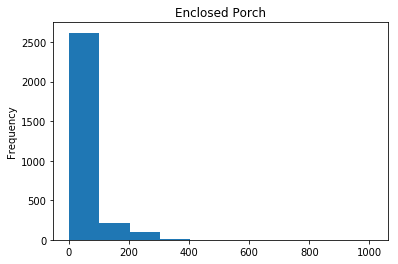

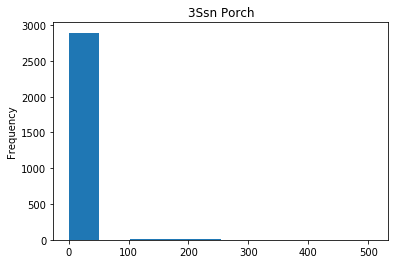

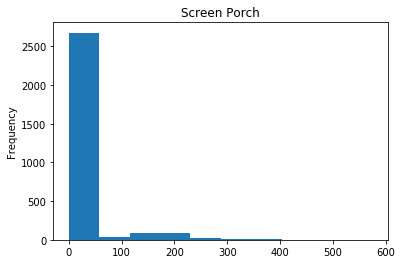

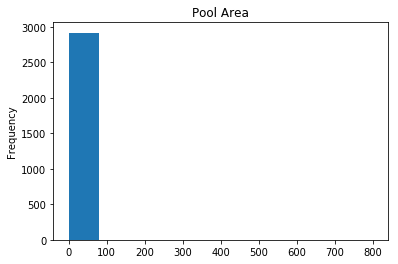

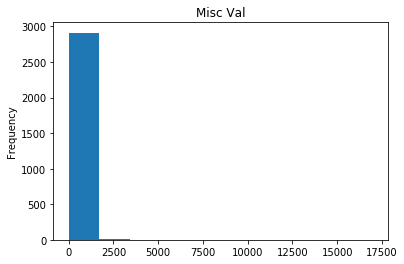

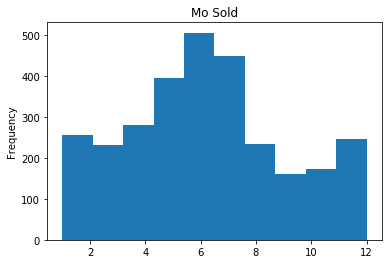

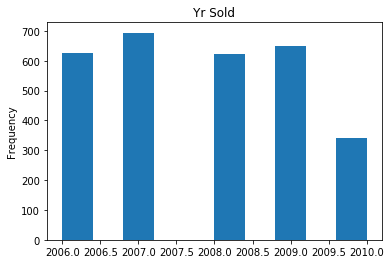

In [39]:
for col in continuous:
    df[col].plot(kind='hist', title=col)
    plt.show()

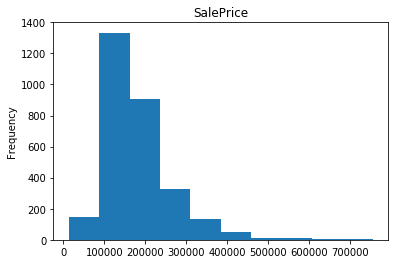

In [40]:
df['SalePrice'].plot(kind='hist', title='SalePrice')

A lot of the continuous data fields, including SalePrice, appear to be skewed or have long tailed distributions. They might be more useful if we were to transform them, such as a lot transformation.  Additionally, note that I am treating ordinal data and time (years/months) as continuous numeric data here. In other scenarios it might make sense to treat these fields differently that the other continuous numeric fields. The ordinal data are even more easy to discern in 1.2.  Additionally, many of the numeric data fields are at quite different scales, so it makes sense to use the StandardScalar later on for the analysis.

### 1.2 Visualize the dependency of the target on each continuous feature (2d scatter plot).

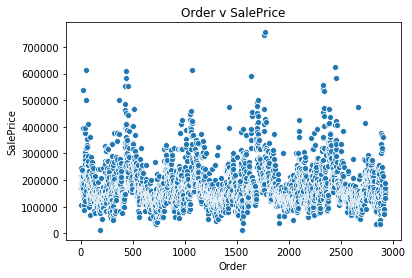

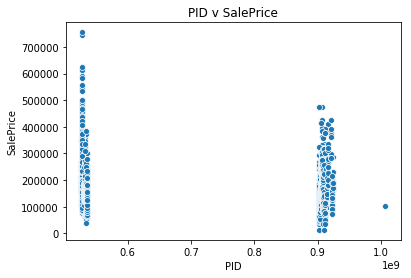

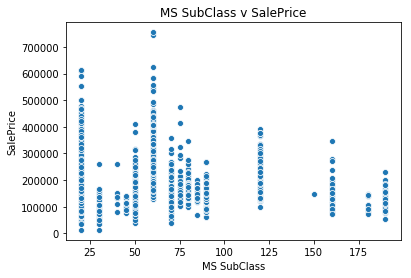

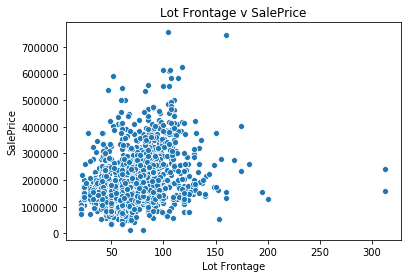

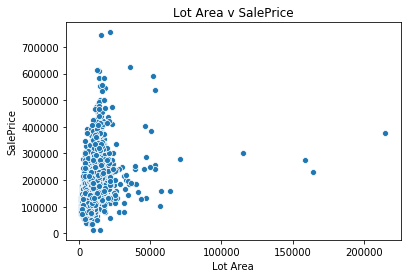

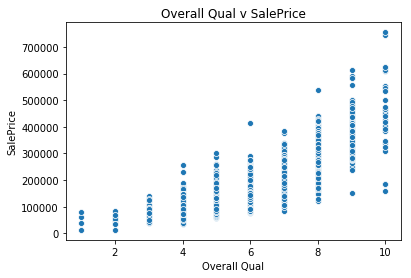

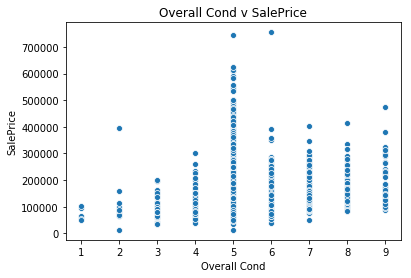

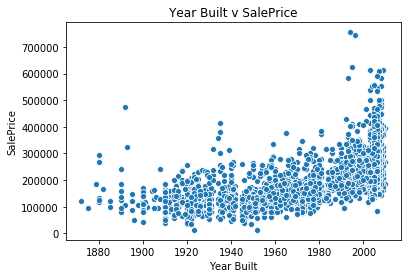

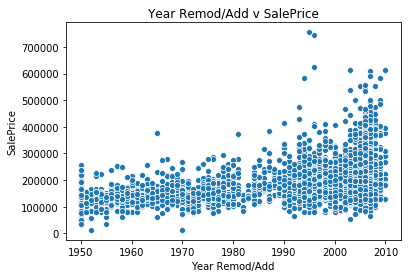

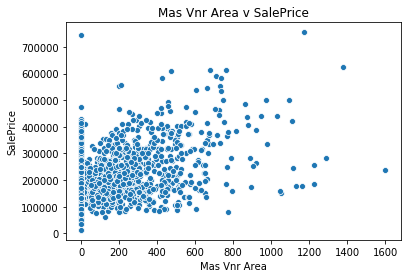

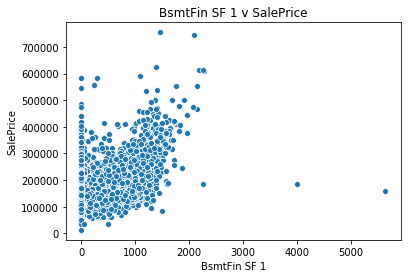

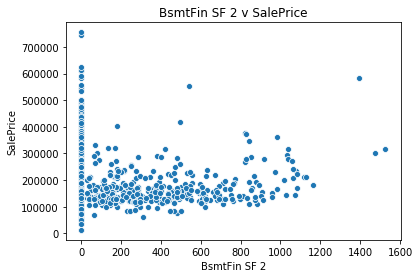

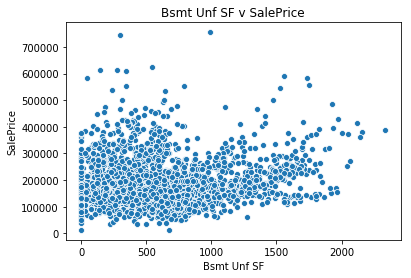

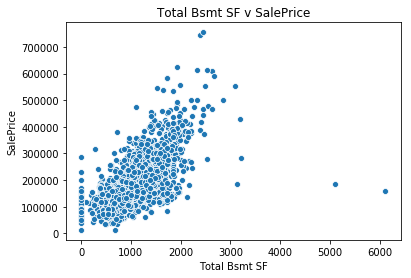

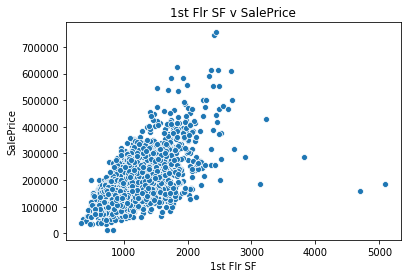

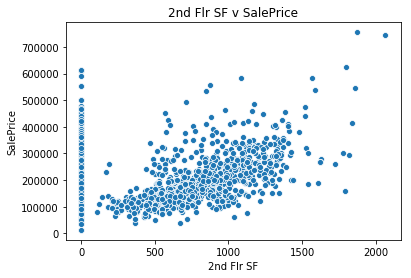

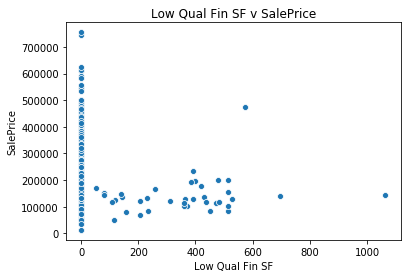

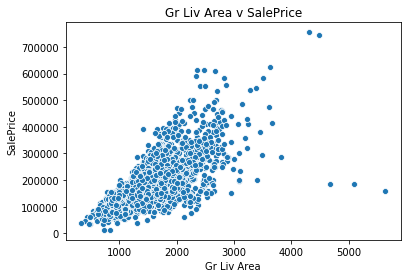

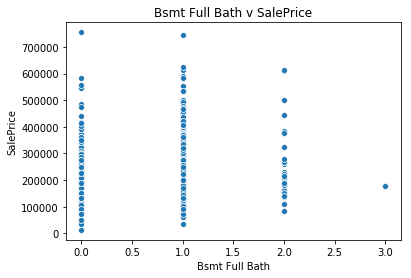

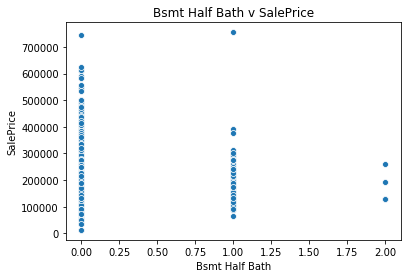

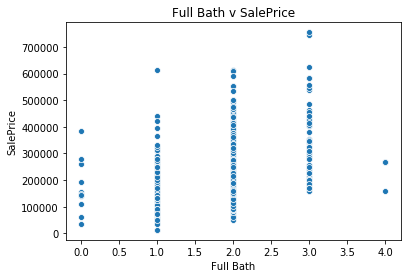

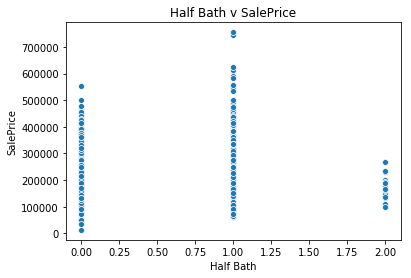

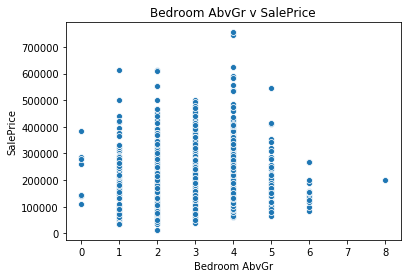

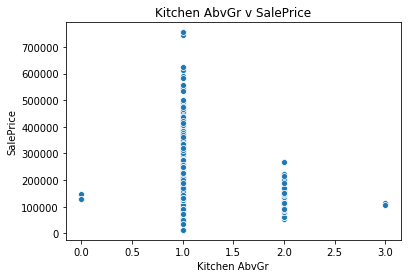

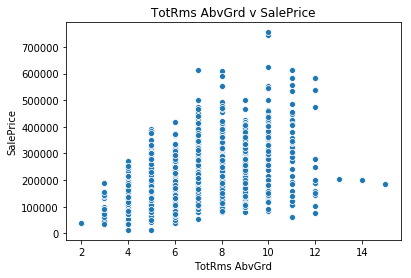

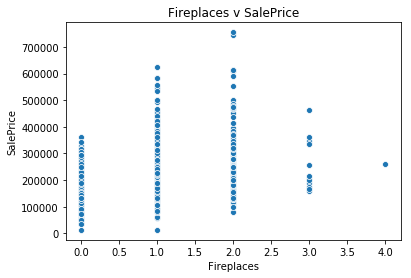

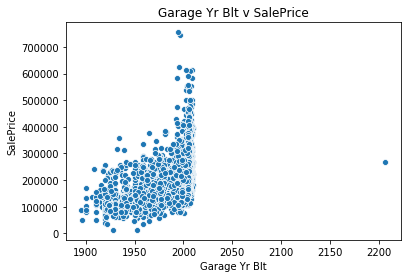

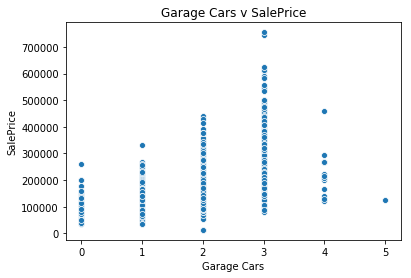

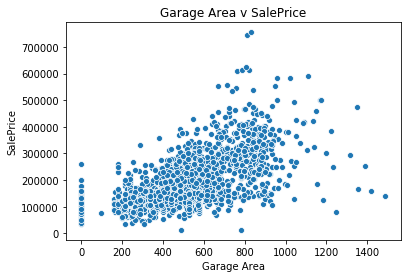

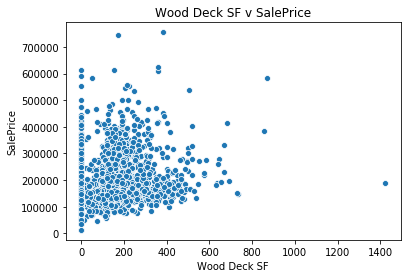

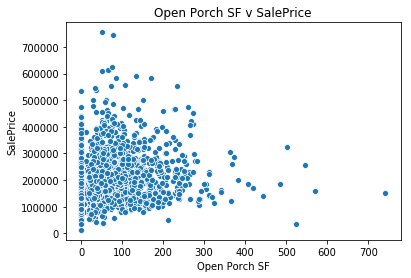

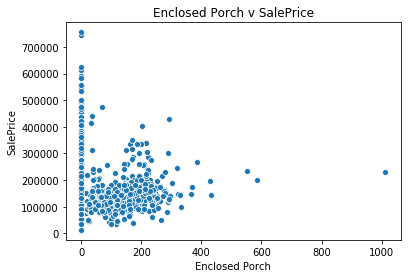

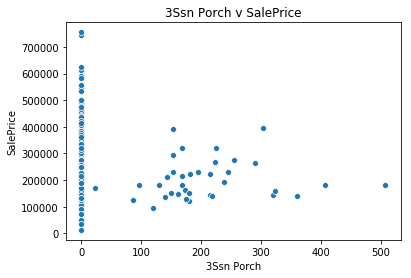

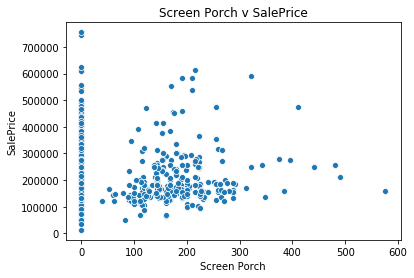

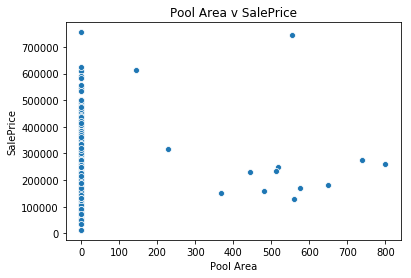

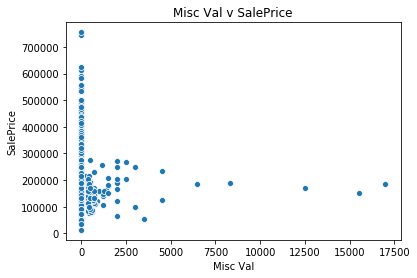

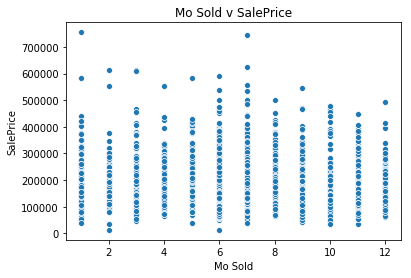

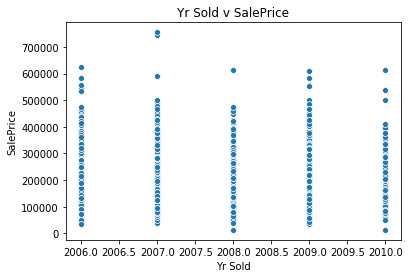

In [41]:
for col in continuous:
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    plt.title(f'{col} v SalePrice')
    plt.show()

### 1.3  Split data in training and test set. Do not use the test-set unless for a final evaluation in 1.6. For each categorical variable, cross-validate a Linear Regression model using just this variable(one-hot-encoded). Visualize the relationship of the categorical variables that provide the best R^2 value with the target.

In [42]:
df_train = df.sample(frac=.9)
df_test = df[~df.index.isin(df_train.index.tolist())]

In [43]:
y_train = df_train['SalePrice']
steps = [
    ('imp', SimpleImputer(strategy='most_frequent')), 
    ('ohe', OneHotEncoder(handle_unknown='ignore')), 
    ('ols', LinearRegression())
]
pipeline = Pipeline(steps)

mean_scores = {}
for col in categorical:
    X_train = pd.DataFrame(df_train[col])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    mean_scores[col] = np.mean(scores)

In [44]:
top_three = sorted(mean_scores, key=mean_scores.get, reverse=True)[:3]
for col in top_three:
    print(col, mean_scores[col])

Neighborhood 0.570311093298116
Bsmt Qual 0.5062764996840493
Exter Qual 0.503395995339161


In [45]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NA_cat,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NA_cat,NA_cat,NA_cat,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NA_cat,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NA_cat,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NA_cat,MnPrv,NA_cat,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NA_cat,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NA_cat,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NA_cat,NA_cat,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NA_cat,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NA_cat,NA_cat,NA_cat,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NA_cat,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NA_cat,MnPrv,NA_cat,0,3,2010,WD,Normal,189900


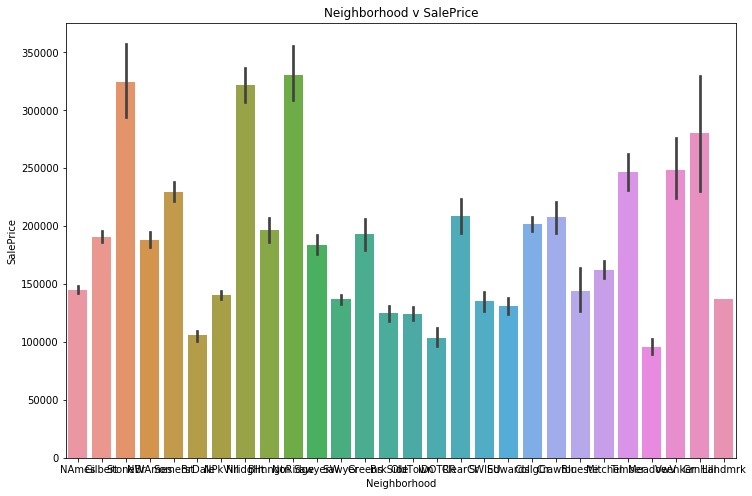

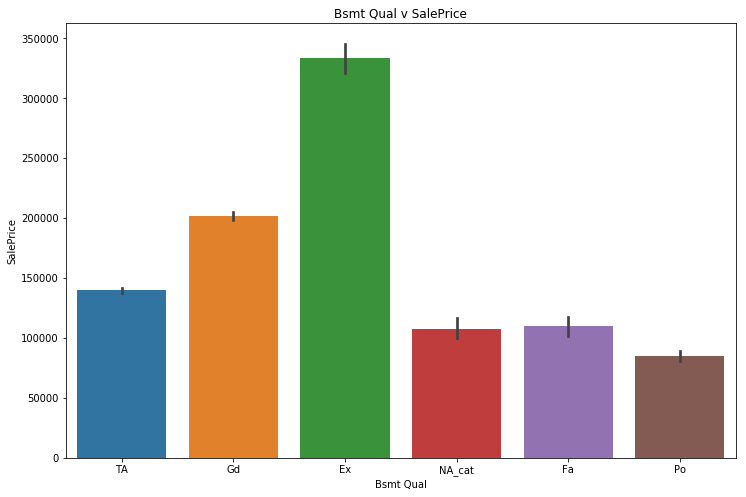

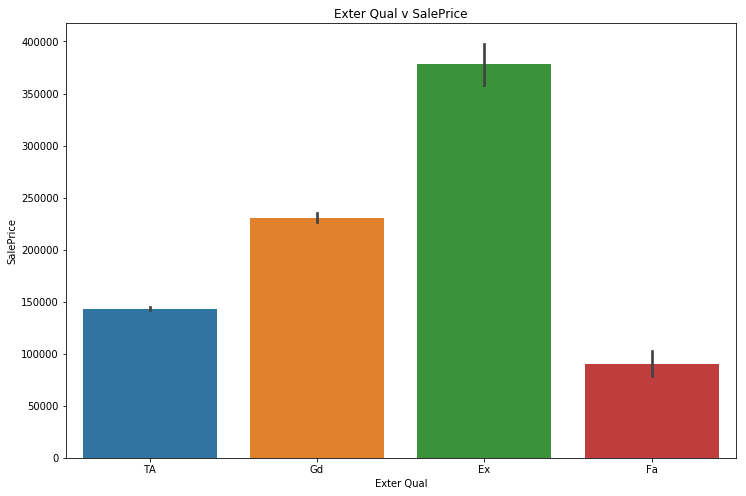

In [46]:
for col in top_three:
    plt.figure(figsize=(12, 8))
    sns.barplot(x=df[col], y=df['SalePrice'])
    plt.title(f'{col} v SalePrice')
    plt.show()

### 1.4 Use ColumnTransformer and pipeline to encode categorical variables. Evaluate LinearRegression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default parameters. Does scaling the data (within the pipeline) with StandardScaler help?

In [61]:
preprocess = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy='mean'), 
                   StandardScaler()), continuous),
    (make_pipeline(SimpleImputer(strategy='most_frequent'), 
                   OneHotEncoder(handle_unknown='ignore')), categorical),
    remainder='passthrough'
)

pipes = {}


In [62]:
pipes['ols'] = make_pipeline(preprocess, LinearRegression())
pipes['ridge'] = make_pipeline(preprocess, Ridge())
pipes['lasso'] = make_pipeline(preprocess, Lasso())
pipes['elastic'] = make_pipeline(preprocess, ElasticNet())

In [63]:
mean_scores = {}
X_train = df_train.drop(['SalePrice'], axis=1)

In [64]:
for name, pipe in pipes.items():
    scores = cross_val_score(pipe, X_train, y_train, cv=5)
    mean_scores[name] = np.mean(scores)

In [60]:
mean_scores

{'ols': 0.6888948220112511,
 'ridge': 0.0035900646817621507,
 'lasso': 0.8455644483809825,
 'elastic': 0.8289270822625163}

Scaling the data helps significantly with ridge, substantially with ols, slightly with elastic and almost none with lasso

#### without scaling
* 'ols': 0.6888948220112511,
* 'ridge': 0.0035900646817621507,
* 'lasso': 0.8455644483809825,
* 'elastic': 0.8289270822625163

#### with scaling
* 'ols': 0.8385769305708575,
* 'ridge': 0.862953361569734,
* 'lasso': 0.8456731771432352,
* 'elastic': 0.8340153353650248

### 1.5 Tune the parameters of the models using GridSearchCV. Do the results improve? Visualize the dependence of the validation score on the parameters for Ridge, Lasso and ElasticNet.

In [65]:
X_test = df_test.drop(['SalePrice'], axis=1)
y_test = df_test['SalePrice']

In [66]:
ridge_params = {'ridge__alpha': np.logspace(-3, 3, 13)}
ridge_grid = GridSearchCV(pipes['ridge'], ridge_params, cv=5, return_train_score=True)
ridge_grid.fit(X_train, y_train)
print(ridge_grid.best_params_)
print(ridge_grid.best_score_)
print(ridge_grid.score(X_test, y_test))

{'ridge__alpha': 10.0}
0.868170276989042
0.9094042370154716


In [67]:
lasso_params = {'lasso__alpha': np.logspace(-3, 0, 13)}
lasso_grid = GridSearchCV(pipes['lasso'], lasso_params, cv=5, return_train_score=True)
lasso_grid.fit(X_train, y_train)
print(lasso_grid.best_params_)
print(lasso_grid.best_score_)
print(lasso_grid.score(X_test, y_test))

{'lasso__alpha': 1.0}
0.8456512423389415
0.9105983268952412


In [68]:
elastic_params = {
    'elasticnet__alpha': np.logspace(-4, -1, 10), 
    'elasticnet__l1_ratio': [0.01, .1, .5, .9, .98, 1]
}
elastic_grid = GridSearchCV(pipes['elastic'], elastic_params, cv=5, return_train_score=True)
elastic_grid.fit(X_train, y_train)
print(elastic_grid.best_params_)
print(elastic_grid.best_score_)
print(elastic_grid.score(X_test, y_test))

{'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.1}
0.8680960134487442
0.911244797818199


The results improve with GridSearchCV for Ridge and ElasticNet, but not really for Lasso. The best CV score for Ridge improves slightly from 0.862 to 0.868. Lasso stays at about 0.845. And ElasticNet from 0.834 to 0.868, making it as good as Ridge regression.  ElasticNet seems to improve the most, however with a larger search space the results for all through could possibly improve even more.

In [69]:
ridge_df = pd.melt(pd.DataFrame({
    'alpha': ridge_grid.cv_results_['param_ridge__alpha'].tolist(),
    'Training Score': ridge_grid.cv_results_['mean_train_score'].tolist(),
    'Cross-validation Score': ridge_grid.cv_results_['mean_test_score'].tolist()
    
}), id_vars=['alpha'])

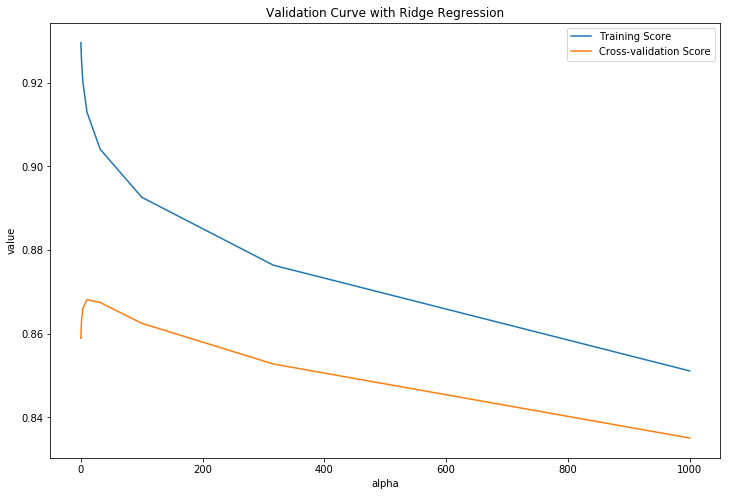

In [70]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='alpha', y='value', hue='variable', data=ridge_df)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.title('Validation Curve with Ridge Regression')
plt.show()

In [71]:
lasso_df = pd.melt(pd.DataFrame({
    'alpha': lasso_grid.cv_results_['param_lasso__alpha'].tolist(),
    'Training Score': lasso_grid.cv_results_['mean_train_score'].tolist(),
    'Cross-validation Score': lasso_grid.cv_results_['mean_test_score'].tolist()
    
}), id_vars=['alpha'])

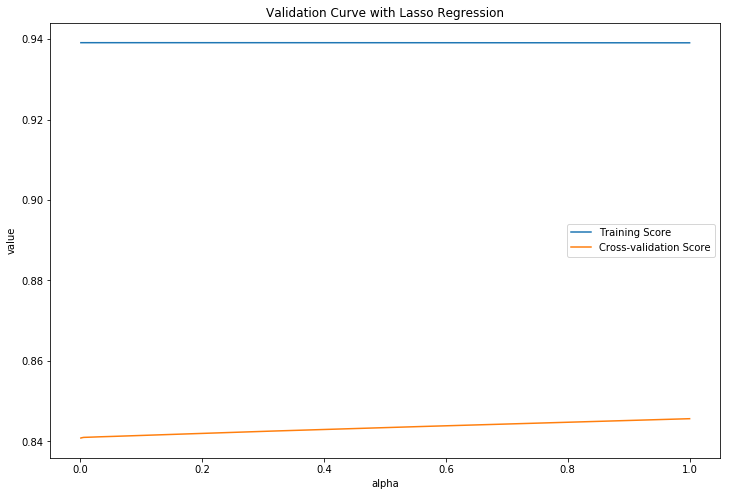

In [72]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='alpha', y='value', hue='variable', data=lasso_df)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.title('Validation Curve with Lasso Regression')
plt.show()

In [73]:
elastic_df = pd.melt(pd.DataFrame({
    'alpha': elastic_grid.cv_results_['param_elasticnet__alpha'].tolist(),
    'Training Score': elastic_grid.cv_results_['mean_train_score'].tolist(),
    'Cross-validation Score': elastic_grid.cv_results_['mean_test_score'].tolist()
    
}), id_vars=['alpha'])

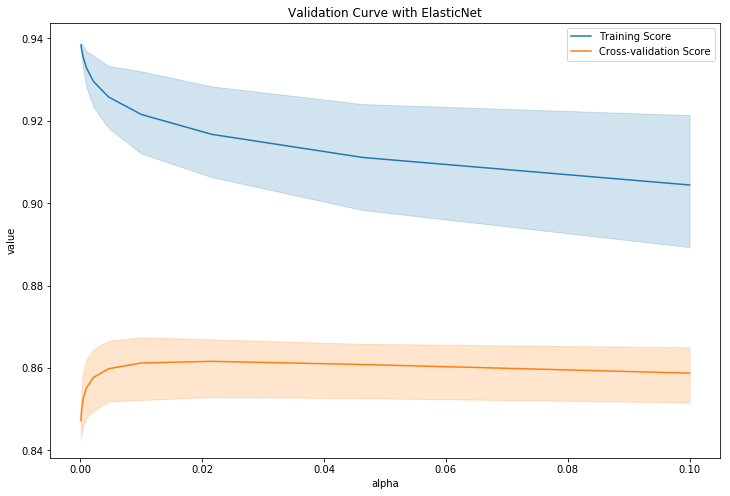

In [74]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='alpha', y='value', hue='variable', data=elastic_df)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.title('Validation Curve with ElasticNet')
plt.show()

In [75]:
res = pd.pivot_table(pd.DataFrame(elastic_grid.cv_results_),
    values='mean_test_score', index='param_elasticnet__alpha', columns='param_elasticnet__l1_ratio')

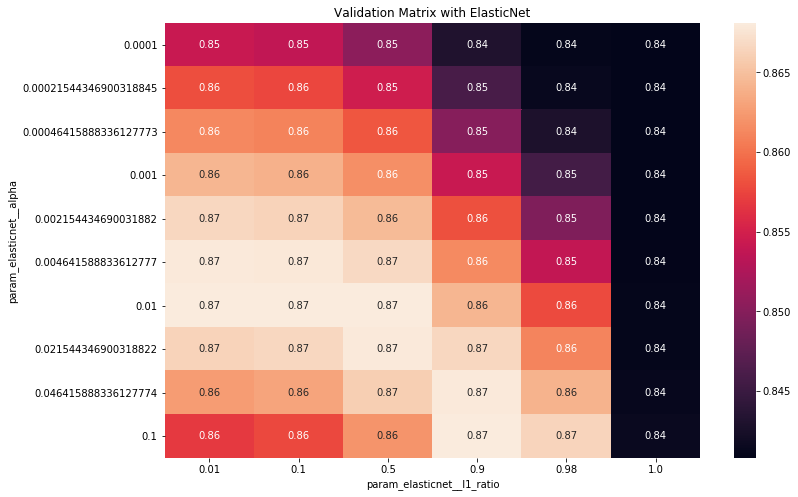

In [78]:
plt.figure(figsize=(12, 8))
sns.heatmap(res, annot=True)
plt.title('Validation Matrix with ElasticNet')
plt.show()

### 1.6 Visualize the coefficients of the resulting models. Do they agree on which features are important?

In [79]:
ridge_coefficients = ridge_grid.best_estimator_.named_steps['ridge'].coef_
ridge_ohe = ridge_grid.best_estimator_.named_steps['columntransformer'].transformers_[1][1].steps[1][1].get_feature_names().tolist()
ridge_feature_names = continuous + ridge_ohe
print(len(ridge_feature_names) == len(ridge_coefficients))

ridge_feature_importance = dict(zip(ridge_feature_names, ridge_coefficients))

True


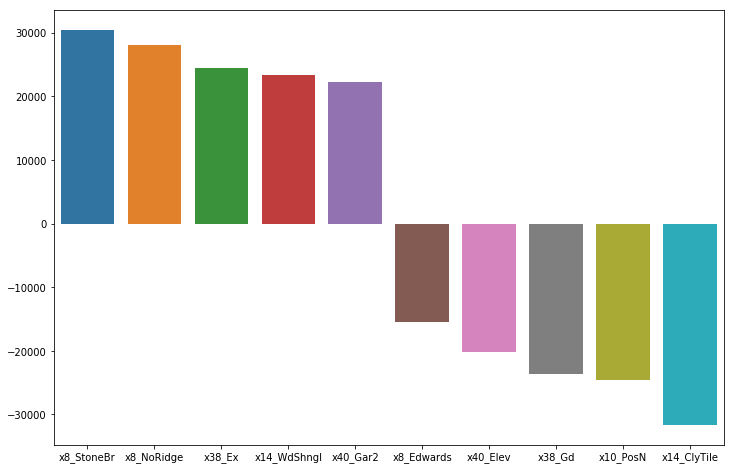

In [80]:
ridge_top_scores = sorted(ridge_feature_importance, key=ridge_feature_importance.get, reverse=True)

ridge_x = []
ridge_y = []
for col in ridge_top_scores[:5] + ridge_top_scores[-5:]:
    ridge_x.append(col)
    ridge_y.append(ridge_feature_importance[col])

plt.figure(figsize=(12, 8))
sns.barplot(x=ridge_x, y=ridge_y)

In [81]:
lasso_coefficients = lasso_grid.best_estimator_.named_steps['lasso'].coef_
lasso_ohe = lasso_grid.best_estimator_.named_steps['columntransformer'].transformers_[1][1].steps[1][1].get_feature_names().tolist()
lasso_feature_names = continuous + lasso_ohe
print(len(lasso_feature_names) == len(lasso_coefficients))

lasso_feature_importance = dict(zip(lasso_feature_names, lasso_coefficients))

True


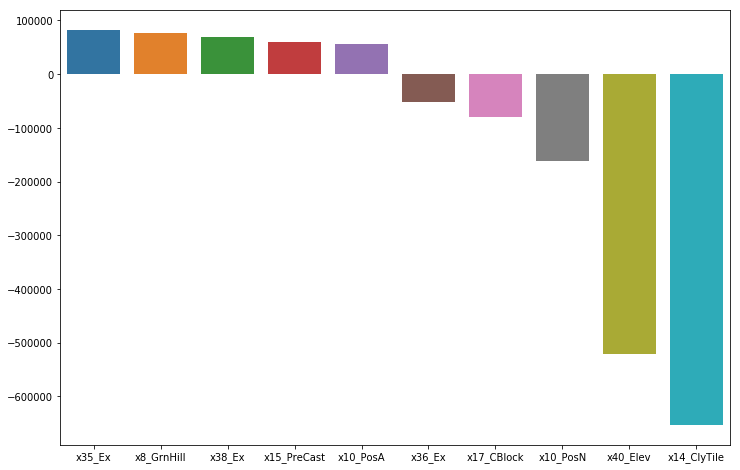

In [82]:
lasso_top_scores = sorted(lasso_feature_importance, key=lasso_feature_importance.get, reverse=True)

lasso_x = []
lasso_y = []
for col in lasso_top_scores[:5] + lasso_top_scores[-5:]:
    lasso_x.append(col)
    lasso_y.append(lasso_feature_importance[col])

plt.figure(figsize=(12, 8))
sns.barplot(x=lasso_x, y=lasso_y)

In [83]:
elastic_coefficients = elastic_grid.best_estimator_.named_steps['elasticnet'].coef_
elastic_ohe = elastic_grid.best_estimator_.named_steps['columntransformer'].transformers_[1][1].steps[1][1].get_feature_names().tolist()
elastic_feature_names = continuous + elastic_ohe
print(len(elastic_feature_names) == len(elastic_coefficients))

elastic_feature_importance = dict(zip(elastic_feature_names, elastic_coefficients))


True


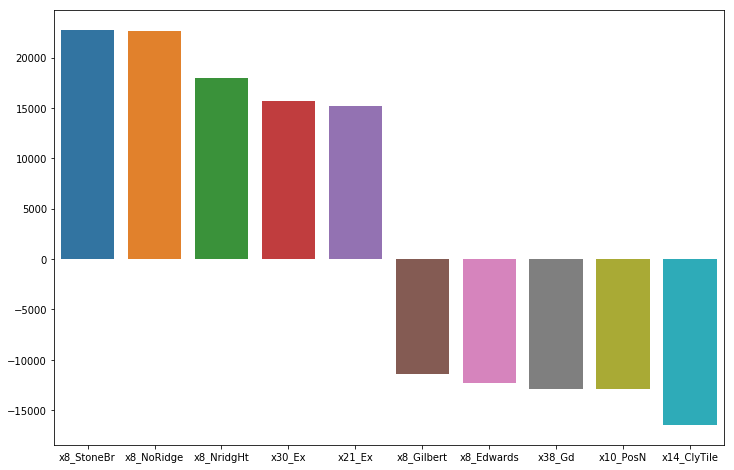

In [84]:
elastic_top_scores = sorted(elastic_feature_importance, key=elastic_feature_importance.get, reverse=True)

elastic_x = []
elastic_y = []
for col in elastic_top_scores[:5] + elastic_top_scores[-5:]:
    elastic_x.append(col)
    elastic_y.append(elastic_feature_importance[col])
    
plt.figure(figsize=(12, 8))
sns.barplot(x=elastic_x, y=elastic_y)

The models agree on some of the features but not all. For instance, they all have x14_ClyTile as the strongest negative relationship, all of them also have x10_PosN as a substantial negative relationship and x30_Ex and a substantial postive relationship.  However, both ElasticNet and Ridge have the strongest positive relationship as x8_StoneBr, however this is not in the Lasso Regression top positive values at all.  More generally, it appears that the Lasso regression absolute negative signals were much higher and its absolute positive signals were lower, whereas for the other models the positive and negative signals seem more balanced.